---
title: "Final Project"
author: "Kaya Lee"
date: "November 1, 2022"
format: 
    pdf:
        fig-dpi: 300
---

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
#pip install pytinytex

from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
#import plotly.express as px #if using plotly
import geopandas as gpd
import plotly
import plotly.express as px


import matplotlib.pyplot as plt
import numpy as np
import matplotlib

import pandas as pd

import plotly

import plotly.graph_objs as go


import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from matplotlib.pyplot import figure


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from datetime import datetime

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

## Tweets DFs

In [2]:
# https://www.kaggle.com/datasets/andradaolteanu/all-elon-musks-tweets

In [5]:
tesla_stock = pd.read_csv("TSLA.csv")

In [21]:
import datetime
date_time_str = str(datetime.datetime.now())
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_obj
print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

Date: 2022-12-08
Time: 12:34:46.795145
Date-time: 2022-12-08 12:34:46.795145


In [26]:
tesla_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3125,2022-11-25,185.059998,185.199997,180.630005,182.860001,182.860001,50672700
3126,2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200
3127,2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100
3128,2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400


In [27]:
tesla_stock["date"] = tesla_stock["Date"]

In [28]:
tesla_stock["Date"] = pd.to_datetime(tesla_stock['Date'], format='%Y-%m-%d %H:%M:%S')

In [29]:
type(tesla_stock["Date"].values[0])

numpy.datetime64

In [30]:
type(tesla_stock["Open"][0])

numpy.float64

In [31]:
#pd.to_datetime(date) - timedelta(days=days)

In [32]:
from datetime import timedelta

In [33]:
tesla_stock["full_day"] = tesla_stock["date"].str.split("-").str[1] + "-"+ tesla_stock["date"].str.split("-").str[2] + "-" + tesla_stock["date"].str.split("-").str[0]

In [34]:
tesla_stock["day"] = tesla_stock["date"].str.split("-", 1).str[1]

In [35]:
tesla_stock

,Date,Open,High,Low,Close,Adj Close,Volume,date,full_day,day
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010-06-29,06-29-2010,06-29
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010-06-30,06-30-2010,06-30
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010-07-01,07-01-2010,07-01
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010-07-02,07-02-2010,07-02
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010-07-06,07-06-2010,07-06
...,...,...,...,...,...,...,...,...,...,...
3125,2022-11-25,185.059998,185.199997,180.630005,182.860001,182.860001,50672700,2022-11-25,11-25-2022,11-25
3126,2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200,2022-11-28,11-28-2022,11-28
3127,2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100,2022-11-29,11-29-2022,11-29
3128,2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400,2022-11-30,11-30-2022,11-30


## August 7th visualization (SEC involvement)

### Long Term (50 days after)

In [94]:
## tesla stock 20 days before and 50 days after
#August 7th, 2018 tweet 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2018-08-07", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2018-08-07", "%Y-%m-%d") + timedelta(days = 50)
august_tweet_lt = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

In [95]:
bar_colors = []
for date in august_tweet_lt["date"]:
    if date == "2018-08-07": 
        bar_colors.append("#1DA1F2")
    else:
        bar_colors.append("#909191")

In [1]:
august_tweet_lt["day"].values

date_labels_aug = [] 
i = 0
for date in august_tweet_lt["day"].values: 
    if (i % 2) == 1:
        date_labels_aug.append(date)
    elif date == "08-07":
        date_labels_aug.append(date)
    else: 
        date_labels_aug.append("")
    i += 1

NameError: name 'august_tweet_lt' is not defined

No handles with labels found to put in legend.


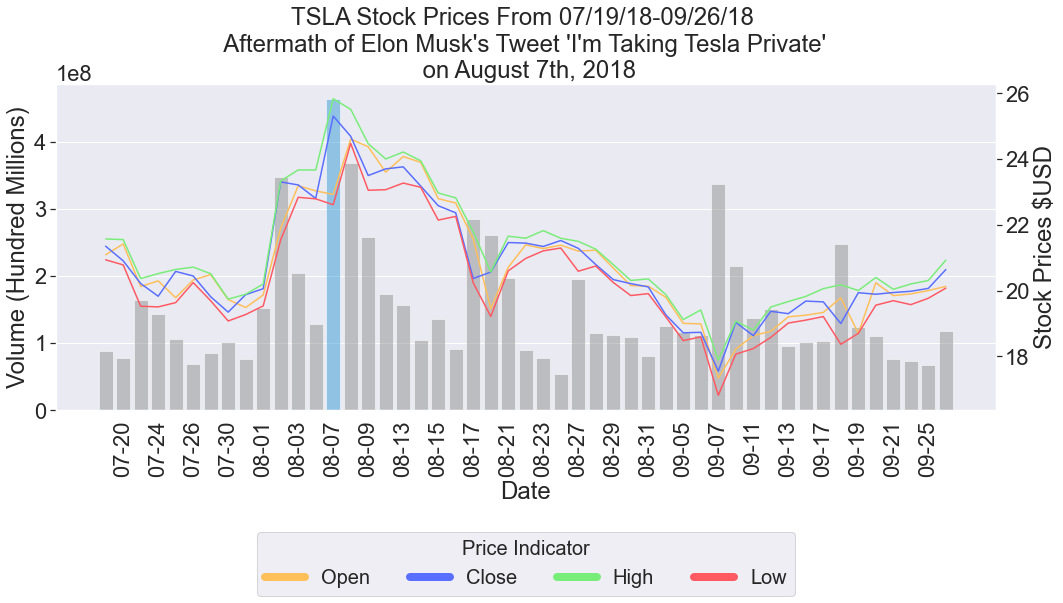

In [99]:
#sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(15,6))

#sns.lineplot(data = df['y_var_1'], marker='o', sort = False, ax=ax1)



ax1 = sns.barplot(x = august_tweet_lt["Date"], y = august_tweet_lt["Volume"], alpha=0.5, palette = bar_colors)
plt.xticks(ticks = ax1.get_xticks(), labels = august_tweet_lt["day"].values, rotation = 90)
plt.ylabel("Volume (Hundred Millions)")
#plt.yticks(ax1.get_xticks(), labels = )


ax2 = ax1.twinx()

sns.lineplot(x = august_tweet_lt["day"], y = tesla_stock["Open"],  ax = ax2, color = "#ffbf59")
sns.lineplot(x = august_tweet_lt["day"], y = tesla_stock["Close"], ax = ax2, color = "#596fff")
sns.lineplot(x = august_tweet_lt["day"], y = tesla_stock["High"], dashes = True, ax = ax2, color = "#79ed79")
sns.lineplot(x = august_tweet_lt["day"], y = tesla_stock["Low"], dashes = True, ax = ax2, color = "#ff5962")

plt.xticks(ticks = ax2.get_xticks(), labels = date_labels_aug, rotation = 45)
plt.ylabel("Stock Prices $USD")
#plt.yticks(ticks = np.arange(18, 28, 2), labels = [str(x) for x in np.arange(18, 28, 2)])

plt.legend()

legend_elements = [Line2D([0], [0], lw=8, label='Open', color = "#ffbf59"), 
                   Line2D([0], [0], lw=8, label='Close', color = "#596fff"),
                  Line2D([0], [0], lw=8, label='High', color = "#79ed79"),
                  Line2D([0], [0], lw=8, label='Low', color = "#ff5962"),]

#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
plt.xticks(ticks = ax2.get_xticks(), labels = date_labels_aug, rotation = 45)

legend = plt.legend(handles=legend_elements, 
           fontsize = "small",
           loc='lower center', 
           title = "Price Indicator", 
           bbox_to_anchor = (0.5, -0.6), 
            ncol = 4)
           #borderpad = 2, )
plt.setp(legend.get_title(),fontsize='small')

plt.title("TSLA Stock Prices From 07/19/18-09/26/18 \n Aftermath of Elon Musk's Tweet 'I'm Taking Tesla Private' \n on August 7th, 2018")

#ax2.get_xticklabels()[13].set_color("#1DA1F2") 

ax2.grid(False)



#sns.barplot(x = august_tweet_st["Date"], y = tesla_stock["Volume"])

#plt.plot(tesla_stock["Date"], tesla_stock["Open"])

# WHY DID THE TESLA STOCK DROP ????

# put small twitter logo under date of blue bar 

## May 5th tweet - tesla stock too high

### Short term

In [106]:
## tesla stock 20 days before and 50 days after
#May 5th tweet --> tesla stock is too high 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2020-05-01", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2020-05-01", "%Y-%m-%d") + timedelta(days = 50)
may_tweet_lt = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

In [107]:
bar_colors = []
for date in may_tweet_lt["date"]:
    if date == "2020-05-01": 
        bar_colors.append("#1DA1F2")
    else:
        bar_colors.append("#b0b0b0")

In [109]:
august_tweet_lt["day"].values

date_labels_may = [] 
i = 0
for date in may_tweet_lt["day"].values: 
    if (i % 2) == 0:
        date_labels_may.append(date)
    elif date == "05-01":
        date_labels_may.append(date)
    else: 
        date_labels_may.append("")
    i += 1

['04-13',
 '',
 '04-15',
 '',
 '04-17',
 '',
 '04-21',
 '',
 '04-23',
 '',
 '04-27',
 '',
 '04-29',
 '',
 '05-01',
 '',
 '05-05',
 '',
 '05-07',
 '',
 '05-11',
 '',
 '05-13',
 '',
 '05-15',
 '',
 '05-19',
 '',
 '05-21',
 '',
 '05-26',
 '',
 '05-28',
 '',
 '06-01',
 '',
 '06-03',
 '',
 '06-05',
 '',
 '06-09',
 '',
 '06-11',
 '',
 '06-15',
 '',
 '06-17',
 '',
 '06-19']

No handles with labels found to put in legend.


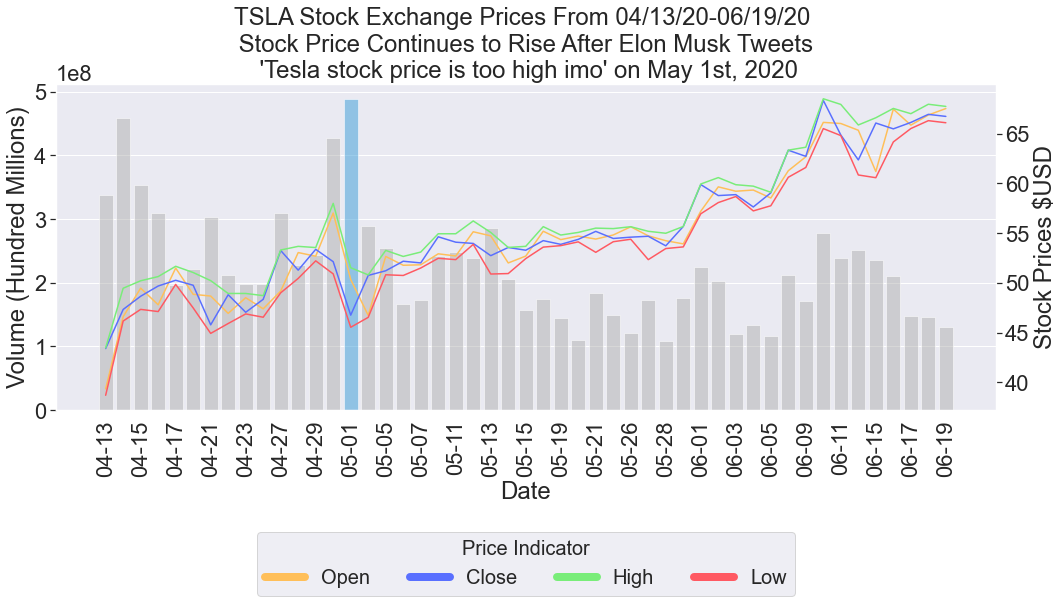

In [110]:
#sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(15,6))

#sns.lineplot(data = df['y_var_1'], marker='o', sort = False, ax=ax1)



ax1 = sns.barplot(x = may_tweet_lt["Date"], y = may_tweet_lt["Volume"], alpha=0.5, palette = bar_colors)
plt.xticks(ticks = ax1.get_xticks(), labels = may_tweet_lt["day"].values, rotation = 90)
plt.ylabel("Volume (Hundred Millions)")
#plt.yticks(ax1.get_xticks(), labels = )


ax2 = ax1.twinx()

sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["Open"],  ax = ax2, color = "#ffbf59")
sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["Close"], ax = ax2, color = "#596fff")
sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["High"], dashes = True, ax = ax2, color = "#79ed79")
sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["Low"], dashes = True, ax = ax2, color = "#ff5962")

plt.xticks(ticks = ax2.get_xticks(), labels =date_labels_may, rotation = 45)
plt.ylabel("Stock Prices $USD")
#plt.yticks(ticks = np.arange(18, 28, 2), labels = [str(x) for x in np.arange(18, 28, 2)])

plt.legend()

legend_elements = [Line2D([0], [0], lw=8, label='Open', color = "#ffbf59"), 
                   Line2D([0], [0], lw=8, label='Close', color = "#596fff"),
                  Line2D([0], [0], lw=8, label='High', color = "#79ed79"),
                  Line2D([0], [0], lw=8, label='Low', color = "#ff5962"),]

#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
plt.xticks(ticks = ax2.get_xticks(), labels =date_labels_may, rotation = 45)

legend = plt.legend(handles=legend_elements, 
           fontsize = "small",
           loc='lower center', 
           title = "Price Indicator", 
           bbox_to_anchor = (0.5, -0.6), 
            ncol = 4)
           #borderpad = 2, )
plt.setp(legend.get_title(),fontsize='small')

plt.title("TSLA Stock Exchange Prices From 04/13/20-06/19/20 \n Stock Price Continues to Rise After Elon Musk Tweets \n 'Tesla stock price is too high imo' on May 1st, 2020")

ax2.grid(False)



#sns.barplot(x = august_tweet_st["Date"], y = tesla_stock["Volume"])

#plt.plot(tesla_stock["Date"], tesla_stock["Open"])

# WHY DID THE TESLA STOCK DROP ????

# put small twitter logo under date of blue bar 

In [56]:
## tesla stock 20 days before and 50 days after
#May 5th tweet --> tesla stock is too high 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2022-10-03", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2022-10-03", "%Y-%m-%d") + timedelta(days = 50)
may_tweet_lt = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

In [57]:
bar_colors = []
for date in may_tweet_lt["date"]:
    if date == "2022-10-03": 
        bar_colors.append("#1DA1F2")
    else:
        bar_colors.append("#b0b0b0")

No handles with labels found to put in legend.


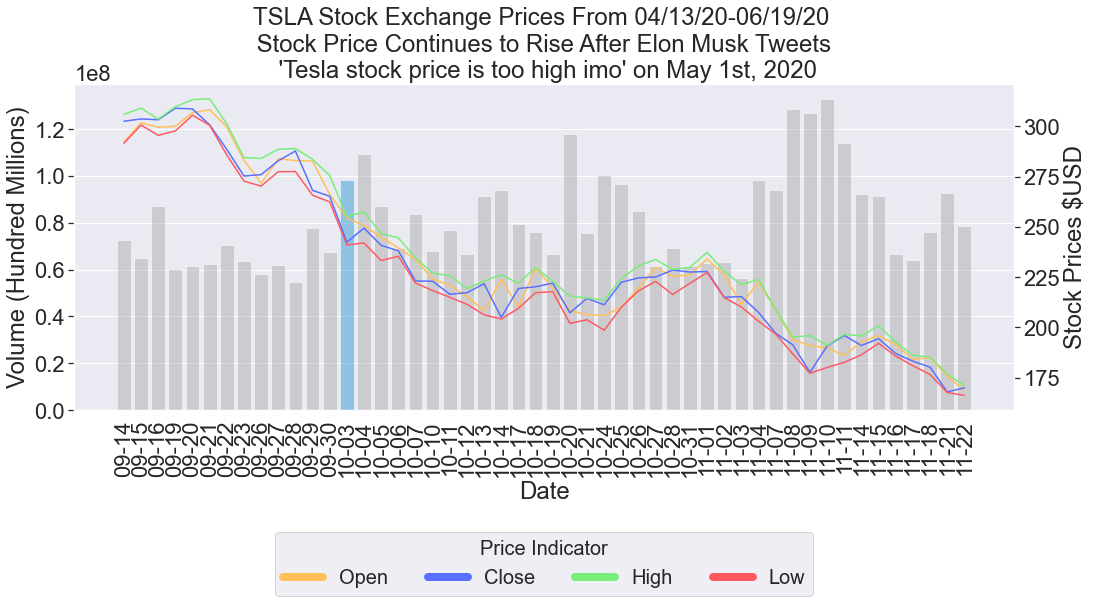

In [58]:
#sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(15,6))

#sns.lineplot(data = df['y_var_1'], marker='o', sort = False, ax=ax1)



ax1 = sns.barplot(x = may_tweet_lt["Date"], y = may_tweet_lt["Volume"], alpha=0.5, palette = bar_colors)
plt.xticks(ticks = ax1.get_xticks(), labels = may_tweet_lt["day"].values, rotation = 90)
plt.ylabel("Volume (Hundred Millions)")
#plt.yticks(ax1.get_xticks(), labels = )


ax2 = ax1.twinx()

sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["Open"],  ax = ax2, color = "#ffbf59")
sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["Close"], ax = ax2, color = "#596fff")
sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["High"], dashes = True, ax = ax2, color = "#79ed79")
sns.lineplot(x = may_tweet_lt["day"], y = may_tweet_lt["Low"], dashes = True, ax = ax2, color = "#ff5962")

plt.xticks(ticks = ax2.get_xticks(), labels = may_tweet_lt["day"].values, rotation = 45)
plt.ylabel("Stock Prices $USD")
#plt.yticks(ticks = np.arange(18, 28, 2), labels = [str(x) for x in np.arange(18, 28, 2)])

plt.legend()

legend_elements = [Line2D([0], [0], lw=8, label='Open', color = "#ffbf59"), 
                   Line2D([0], [0], lw=8, label='Close', color = "#596fff"),
                  Line2D([0], [0], lw=8, label='High', color = "#79ed79"),
                  Line2D([0], [0], lw=8, label='Low', color = "#ff5962"),]

#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
plt.xticks(ticks = ax2.get_xticks(), labels = may_tweet_lt["day"].values, rotation = 45)

legend = plt.legend(handles=legend_elements, 
           fontsize = "small",
           loc='lower center', 
           title = "Price Indicator", 
           bbox_to_anchor = (0.5, -0.6), 
            ncol = 4)
           #borderpad = 2, )
plt.setp(legend.get_title(),fontsize='small')

plt.title("TSLA Stock Exchange Prices From 04/13/20-06/19/20 \n Stock Price Continues to Rise After Elon Musk Tweets \n 'Tesla stock price is too high imo' on May 1st, 2020")

ax2.get_xticklabels()[13].set_color("#1DA1F2") 

ax2.grid(False)



#sns.barplot(x = august_tweet_st["Date"], y = tesla_stock["Volume"])

#plt.plot(tesla_stock["Date"], tesla_stock["Open"])

# WHY DID THE TESLA STOCK DROP ????

# put small twitter logo under date of blue bar 

## Volatility of Tesla Stock

In [59]:
## volatility of tesla stock 
# 2013 - present
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2013-01-01", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2022-12-01", "%Y-%m-%d") + timedelta(days = 20)
volatility = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

volatility

,Date,Open,High,Low,Close,Adj Close,Volume,date,full_day,day
620,2012-12-13,2.350667,2.353333,2.183333,2.240667,2.240667,32269500,2012-12-13,12-13-2012,12-13
621,2012-12-14,2.252000,2.293333,2.239333,2.254000,2.254000,15345000,2012-12-14,12-14-2012,12-14
622,2012-12-17,2.251333,2.300000,2.250000,2.293333,2.293333,12373500,2012-12-17,12-17-2012,12-17
623,2012-12-18,2.284000,2.338000,2.284000,2.306000,2.306000,23308500,2012-12-18,12-18-2012,12-18
624,2012-12-19,2.316667,2.350667,2.301333,2.307333,2.307333,19482000,2012-12-19,12-19-2012,12-19
...,...,...,...,...,...,...,...,...,...,...
3125,2022-11-25,185.059998,185.199997,180.630005,182.860001,182.860001,50672700,2022-11-25,11-25-2022,11-25
3126,2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200,2022-11-28,11-28-2022,11-28
3127,2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100,2022-11-29,11-29-2022,11-29
3128,2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400,2022-11-30,11-30-2022,11-30


In [60]:
import plotly.express as px
import pandas as pd

In [61]:
## look into tweets that include tesla and their respective volumes 

# Controversial tweet volume analysis 

In [62]:
## tesla stock 20 days before and 50 days after
#August 7th, 2018 tweet 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2020-05-18", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2020-05-18", "%Y-%m-%d") + timedelta(days = 20)
democrats = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

In [63]:
bar_colors = []
for date in democrats["date"]:
    if date == "2020-05-18": 
        bar_colors.append("#1DA1F2")
    else:
        bar_colors.append("#b0b0b0")

Text(0, 0.5, 'TSLA Trade Volume (Hundred Millions)')

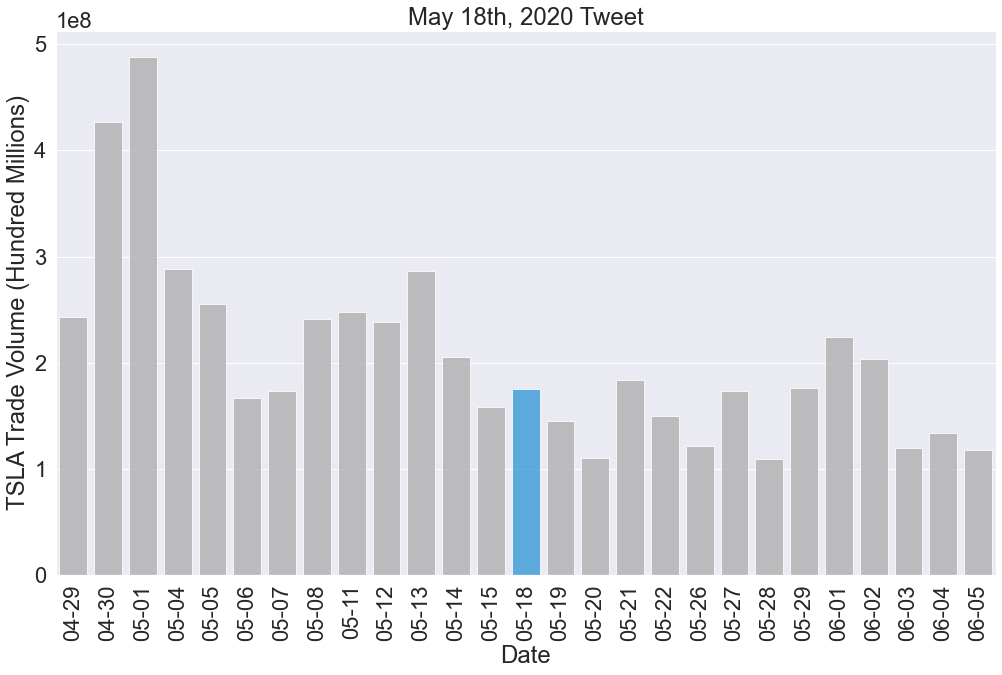

In [64]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style(style=None, rc=None )
ax1 = sns.barplot(x = democrats["Date"], y = democrats["Volume"], alpha=0.8, palette = bar_colors)
plt.xticks(ticks = ax1.get_xticks(), labels = democrats["day"].values, rotation = 90)
plt.title("May 18th, 2020 Tweet")
plt.ylabel("TSLA Trade Volume (Hundred Millions)")

In [65]:
## tesla stock 20 days before and 50 days after
#August 7th, 2018 tweet 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2022-10-03", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2022-10-03", "%Y-%m-%d") + timedelta(days = 20)
ukraine = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

In [66]:
bar_colors = []
for date in ukraine["date"]:
    if date == "2022-10-03": 
        bar_colors.append("#1DA1F2")
    else:
        bar_colors.append("#b0b0b0")

Text(0.5, 1.0, 'October 3rd, 2022 Tweet')

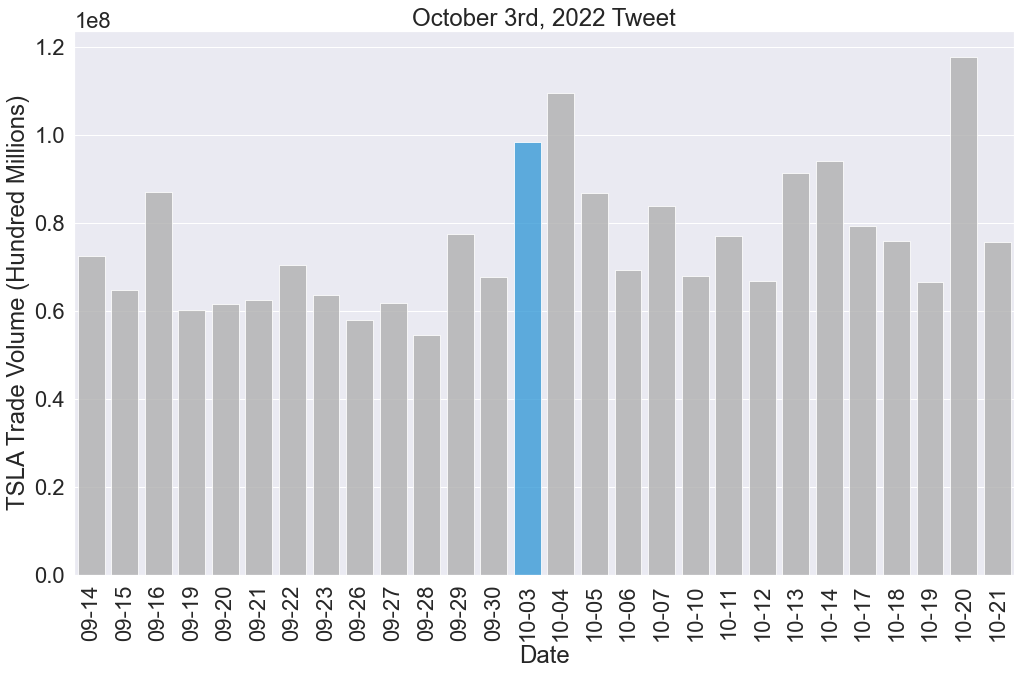

In [67]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style(style=None, rc=None )
ax1 = sns.barplot(x = ukraine["Date"], y = ukraine["Volume"], alpha=0.8, palette = bar_colors)
plt.xticks(ticks = ax1.get_xticks(), labels = ukraine["day"].values, rotation = 90)
plt.ylabel("TSLA Trade Volume (Hundred Millions)")
plt.title("October 3rd, 2022 Tweet")

In [68]:
## tesla stock 20 days before and 50 days after
#August 7th, 2018 tweet 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2020-12-16", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2020-12-16", "%Y-%m-%d") + timedelta(days = 20)
pronouns_nightmare = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

In [69]:
bar_colors = []
for date in pronouns_nightmare["date"]:
    if date == "2020-12-16": 
        bar_colors.append("#1DA1F2")
    else:
        bar_colors.append("#b0b0b0")

Text(0.5, 1.0, 'December 16th, 2020 Tweet')

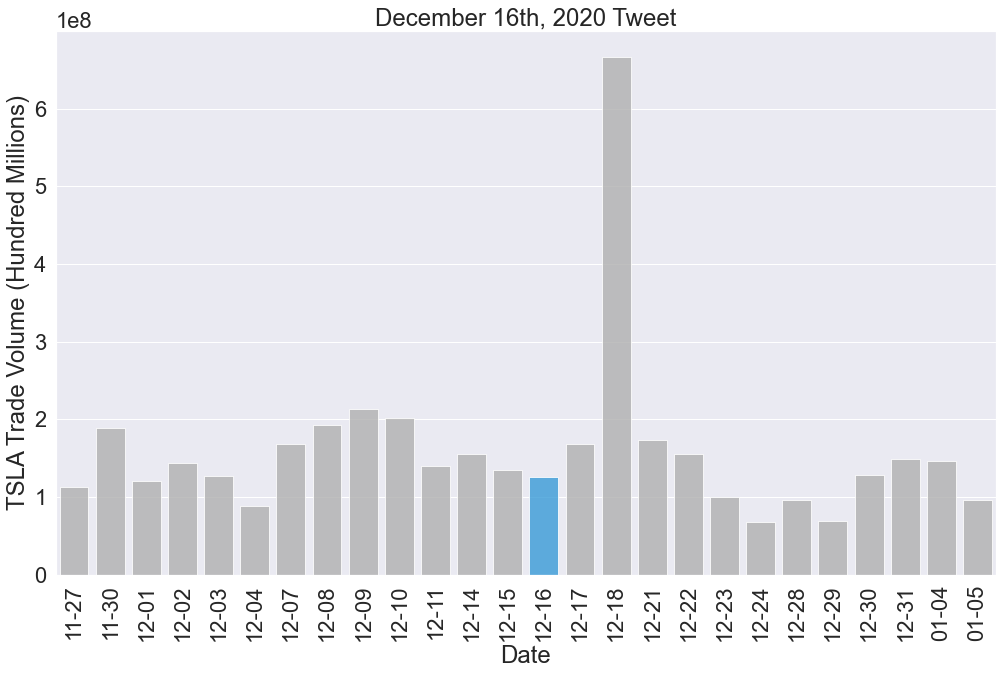

In [70]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style(style=None, rc=None )
ax1 = sns.barplot(x = pronouns_nightmare["Date"], y = pronouns_nightmare["Volume"], alpha=0.8, palette = bar_colors)
plt.xticks(ticks = ax1.get_xticks(), labels = pronouns_nightmare["day"].values, rotation = 90)
plt.ylabel("TSLA Trade Volume (Hundred Millions)")
plt.title("December 16th, 2020 Tweet")

In [71]:
## tesla stock 20 days before and 50 days after
#August 7th, 2018 tweet 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2020-07-24", "%Y-%m-%d") - timedelta(days = 20)
end_date = datetime.datetime.strptime("2020-07-24", "%Y-%m-%d") + timedelta(days = 20)
pronouns_suck = tesla_stock[(tesla_stock["Date"] > start_date) & (tesla_stock["Date"] <= end_date)]

In [72]:
bar_colors = []
for date in pronouns_suck["date"]:
    if date == "2020-07-24": 
        bar_colors.append("#1DA1F2")
    else:
        bar_colors.append("#b0b0b0")

Text(0.5, 1.0, 'July 24th, 2020 Tweet')

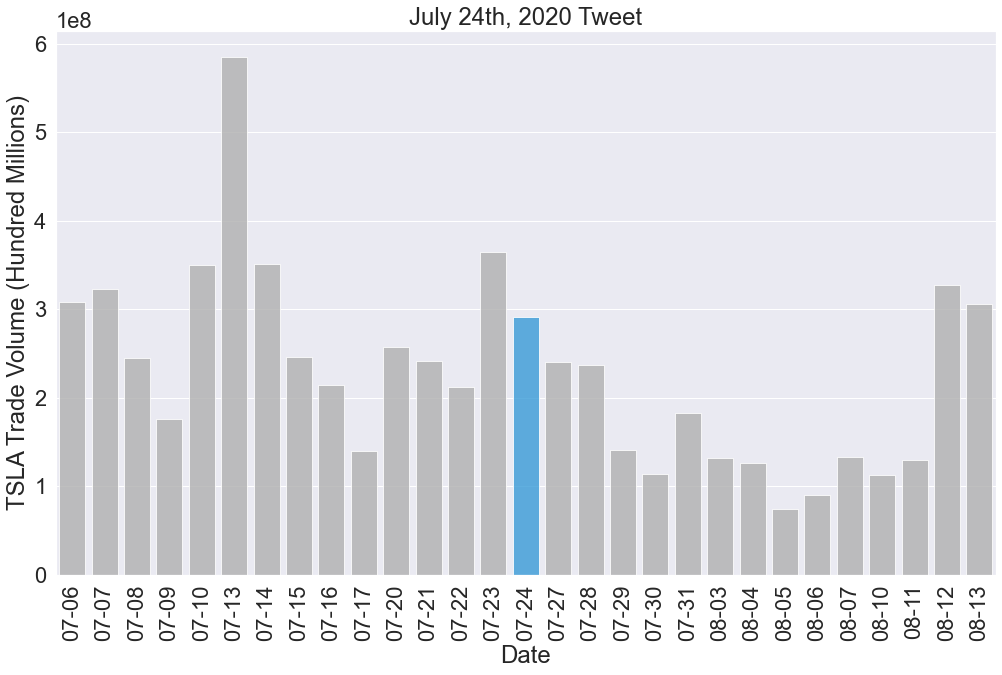

In [73]:
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style(style=None, rc=None )
ax1 = sns.barplot(x = pronouns_suck["Date"], y = pronouns_suck["Volume"], alpha=0.8, palette = bar_colors)
plt.ylabel("TSLA Trade Volume (Hundred Millions)")
plt.xticks(ticks = ax1.get_xticks(), labels = pronouns_suck["day"].values, rotation = 90)
plt.title("July 24th, 2020 Tweet")

# Stock and Volatility Data

In [74]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import cufflinks as cf
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()

In [77]:
tesla_stock 

,Date,Open,High,Low,Close,Adj Close,Volume,date,full_day,day
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010-06-29,06-29-2010,06-29
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010-06-30,06-30-2010,06-30
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010-07-01,07-01-2010,07-01
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010-07-02,07-02-2010,07-02
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010-07-06,07-06-2010,07-06
...,...,...,...,...,...,...,...,...,...,...
3125,2022-11-25,185.059998,185.199997,180.630005,182.860001,182.860001,50672700,2022-11-25,11-25-2022,11-25
3126,2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200,2022-11-28,11-28-2022,11-28
3127,2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100,2022-11-29,11-29-2022,11-29
3128,2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400,2022-11-30,11-30-2022,11-30


In [78]:
single_stock = yf.download('tsla', start="2010-06-29", end="2022-12-05")

[*********************100%***********************]  1 of 1 completed


In [79]:
single_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200
2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100
2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400


In [113]:
%matplotlib notebook

plt.plot(single_stock.index, single_stock["High"])

<IPython.core.display.Javascript object>

In [115]:
single_stock.reset_index(inplace = True)

In [117]:
single_stock[single_stock["Date"].str.contains("2018")]

AttributeError: Can only use .str accessor with string values!

In [ ]:
%matplotlib notebook

plt.plot(single_stock.index, single_stock["High"])

In [124]:
## tesla stock 20 days before and 50 days after
#August 7th, 2018 tweet 
# datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
start_date = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2022-12-05", "%Y-%m-%d")
volatility = tesla_stock[(single_stock["Date"] >= start_date) & (single_stock["Date"] <= end_date)]

In [127]:
volatility

,Date,Open,High,Low,Close,Adj Close,Volume,date,full_day,day
1891,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,2018-01-02,01-02-2018,01-02
1892,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,2018-01-03,01-03-2018,01-03
1893,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,2018-01-04,01-04-2018,01-04
1894,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,2018-01-05,01-05-2018,01-05
1895,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,2018-01-08,01-08-2018,01-08
...,...,...,...,...,...,...,...,...,...,...
3125,2022-11-25,185.059998,185.199997,180.630005,182.860001,182.860001,50672700,2022-11-25,11-25-2022,11-25
3126,2022-11-28,179.960007,188.500000,179.000000,182.919998,182.919998,92905200,2022-11-28,11-28-2022,11-28
3127,2022-11-29,184.990005,186.380005,178.750000,180.830002,180.830002,83357100,2022-11-29,11-29-2022,11-29
3128,2022-11-30,182.429993,194.759995,180.630005,194.699997,194.699997,109186400,2022-11-30,11-30-2022,11-30


In [134]:
single_stock = yf.download('tsla', start="2010-06-29", end="2022-12-05")

[*********************100%***********************]  1 of 1 completed


In [137]:
stk = yf.download('tsla', start="2022-05-27", end="2022-12-05")

[*********************100%***********************]  1 of 1 completed


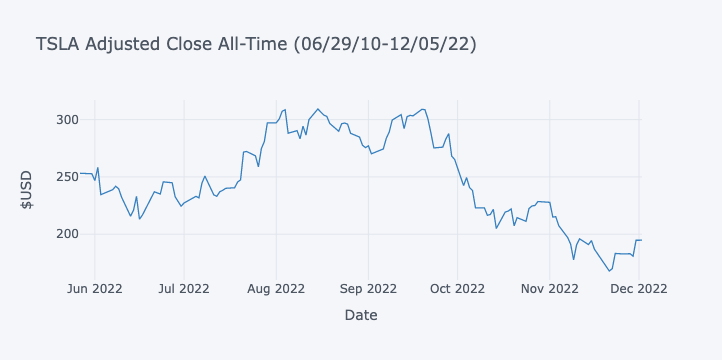

AttributeError: 'NoneType' object has no attribute 'write_html'

In [138]:
close = stk['Adj Close'].iplot(title='TSLA Adjusted Close All-Time (06/29/10-12/05/22)', colors=['blue'], xTitle = "Date", yTitle = "$USD", filename = "close.html", sharing = True)

#plotly-opensource